In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import re
import requests

In [3]:
start = 2004
stop = 2020

# Let's use a for loop to secure the data from 2004 to today

In [4]:
for year in range(start,stop,1):
    site = 'https://www.basketball-reference.com/leagues/NBA_{}.html'
    tableID = 'team-stats-per_game'
    
    comm = re.compile("<!--|-->")
    url= site.format(year)
    file = "{}.csv"
    
    html = requests.get(url).text
    cleaned_soup = BeautifulSoup(re.sub("<!--|-->","", str(html)),'lxml')
    
    tableStats = cleaned_soup.find('table', {'id':tableID})
    
    headers = [th.getText() for th in tableStats.findAll('tr')[0].findAll('th')]
    headers = headers[1:]
    rows = tableStats.findAll('tr')[1:]
    stats = [[td.getText() for td in rows[i].findAll('td')]
                for i in range(len(rows))]
        
    stats = pd.DataFrame(stats, columns = headers)
    
    for col in stats:
        if col != 'Team':
            stats[col] = stats[col].rank()
            
    stats["Playoffs"] = ["1" if "*"  in ele else "0" for ele in stats["Team"]]
    
    if year == start:
        overallstats = stats
    if year != start:
        overallstats = overallstats.append(stats, ignore_index=True)

# So, now let's look at what stats we scraped:

In [5]:
overallstats

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs
0,Dallas Mavericks*,15.5,13.5,30.0,30.0,28.0,25.0,24.0,20.0,30.0,...,30.0,25.5,29.0,28.0,16.5,21.0,1.0,3.0,2.0,1
1,Sacramento Kings*,15.5,9.5,29.0,25.0,29.5,29.0,25.0,30.0,21.0,...,6.0,18.5,8.5,30.0,24.0,4.5,6.5,2.0,1.0,1
2,Los Angeles Lakers*,15.5,22.5,27.0,23.5,27.0,8.0,7.5,5.0,26.5,...,17.0,23.5,24.5,27.0,21.0,8.5,5.0,13.5,30.0,1
3,Milwaukee Bucks*,15.5,9.5,25.0,21.0,25.0,11.0,11.0,21.0,25.0,...,12.0,20.0,14.5,24.0,3.0,11.5,3.0,5.0,29.0,1
4,Denver Nuggets*,15.5,3.5,26.0,28.5,21.0,4.0,3.0,8.5,26.5,...,24.0,6.0,16.0,21.5,28.0,26.0,21.0,21.0,28.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Chicago Bulls,16.0,29.0,8.0,9.0,11.0,27.0,4.0,12.5,18.5,...,20.5,10.0,6.0,4.0,12.0,4.5,19.0,9.5,4.0,0
491,New York Knicks,16.0,10.5,2.0,12.5,1.0,1.5,9.0,3.5,6.0,...,7.0,11.0,10.5,1.0,7.5,18.0,15.5,16.0,3.0,0
492,Cleveland Cavaliers,16.0,6.0,5.0,8.0,3.0,5.0,7.0,18.5,11.0,...,8.0,2.5,5.0,2.0,2.5,1.0,9.0,6.5,2.0,0
493,Memphis Grizzlies,16.0,27.0,1.0,1.0,8.5,30.5,6.0,6.0,5.0,...,20.5,5.0,2.0,11.5,24.0,27.5,15.5,25.5,1.0,0


In [10]:
import matplotlib.pyplot as plt

# Data for playoff teams
Note, you don't always have to do "astype", but in Jupyter notebook it wanted to make the playoff value a string not int

In [11]:
noplayoffs = overallstats[overallstats['Playoffs'].astype(int) == 0]
noplayoffs = noplayoffs[~noplayoffs['Team'].str.contains("League Average")]
noplayoffs

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs
5,Seattle SuperSonics,15.5,13.5,22.0,19.0,24.0,30.0,28.0,29.0,2.0,...,7.0,2.0,1.0,20.0,19.5,11.5,10.0,20.0,27.0,0
8,Los Angeles Clippers,15.5,13.5,12.0,18.0,6.5,4.0,5.0,3.5,20.0,...,29.0,11.0,26.5,9.0,8.5,8.5,26.0,22.5,24.0,0
10,Phoenix Suns,15.5,3.5,23.5,23.5,21.0,14.5,12.0,16.0,24.0,...,8.0,8.0,4.0,5.0,27.0,11.5,20.0,26.0,22.0,0
11,Orlando Magic,15.5,18.5,20.0,28.5,8.0,17.5,14.5,14.5,18.5,...,17.0,3.0,7.0,5.0,1.0,1.5,4.0,16.0,21.0,0
12,Golden State Warriors,15.5,22.5,17.5,12.5,17.5,17.5,18.5,6.0,16.5,...,17.0,23.5,24.5,12.5,5.0,11.5,14.0,7.0,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Miami Heat,16.0,3.0,7.0,10.0,8.5,11.0,18.0,10.0,8.0,...,13.0,17.0,22.0,14.0,17.0,27.5,24.0,16.0,5.0,0
490,Chicago Bulls,16.0,29.0,8.0,9.0,11.0,27.0,4.0,12.5,18.5,...,20.5,10.0,6.0,4.0,12.0,4.5,19.0,9.5,4.0,0
491,New York Knicks,16.0,10.5,2.0,12.5,1.0,1.5,9.0,3.5,6.0,...,7.0,11.0,10.5,1.0,7.5,18.0,15.5,16.0,3.0,0
492,Cleveland Cavaliers,16.0,6.0,5.0,8.0,3.0,5.0,7.0,18.5,11.0,...,8.0,2.5,5.0,2.0,2.5,1.0,9.0,6.5,2.0,0


"\nfor stat in noplayoffs:\n    if stat not in ['Team','G','MP','Playoffs']:\n        x = noplayoffs[stat]\n        plt.figure(figsize=(3,3))\n        plt.hist(x, bins = 8)\n        plt.suptitle(stat, fontsize=18)\n        plt.xlabel('Rank', fontsize=15)\n        plt.ylabel('Count', fontsize=15)\n        plt.show()"

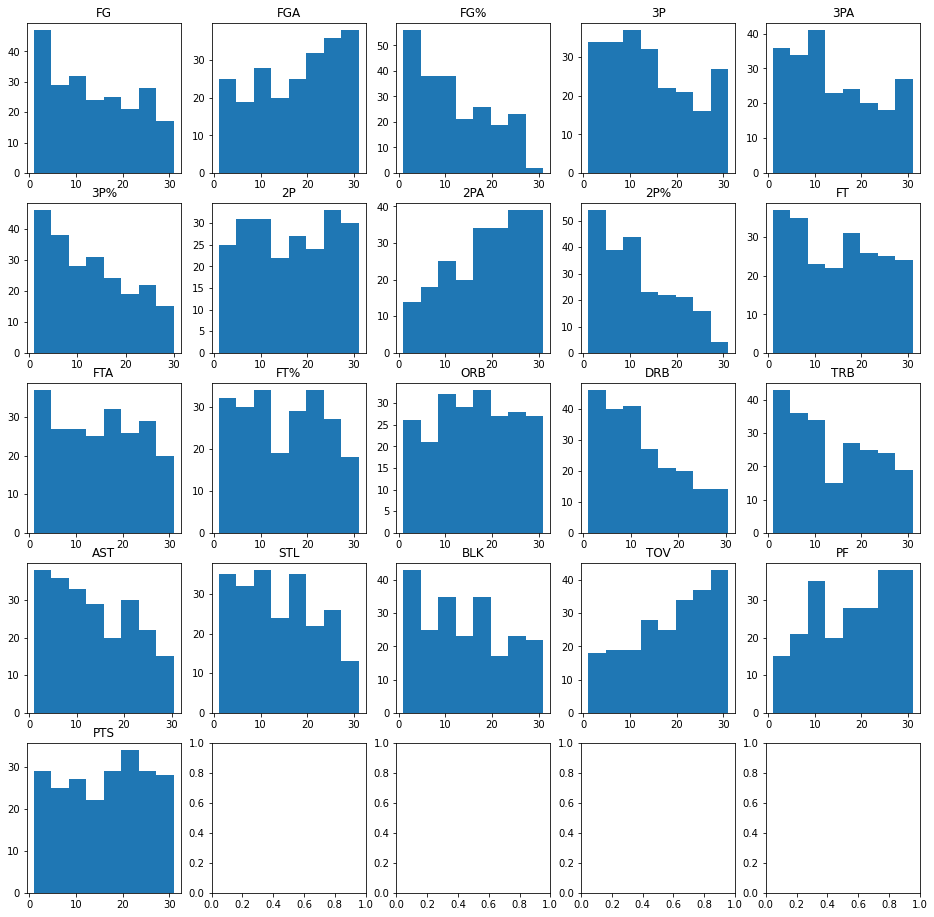

In [54]:
fig, axs = plt.subplots(5,5, figsize=(16,16))
y=0
z=0
for stat in noplayoffs:
    if stat not in ['Team','G','MP','Playoffs']:
        axs[y,z].hist(noplayoffs[stat], bins = 8)
        axs[y,z].set_title(stat)
        if z < 5:
            z+=1
        if z == 5:
            z = 0
            y+=1

# This is the data of playoff teams:

In [55]:
playoffs = overallstats[overallstats['Playoffs'].astype(int) == 1]
playoffs = playoffs[~playoffs['Team'].str.contains("League Average")]
playoffs

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs
0,Dallas Mavericks*,15.5,13.5,30.0,30.0,28.0,25.0,24.0,20.0,30.0,...,30.0,25.5,29.0,28.0,16.5,21.0,1.0,3.0,2.0,1
1,Sacramento Kings*,15.5,9.5,29.0,25.0,29.5,29.0,25.0,30.0,21.0,...,6.0,18.5,8.5,30.0,24.0,4.5,6.5,2.0,1.0,1
2,Los Angeles Lakers*,15.5,22.5,27.0,23.5,27.0,8.0,7.5,5.0,26.5,...,17.0,23.5,24.5,27.0,21.0,8.5,5.0,13.5,30.0,1
3,Milwaukee Bucks*,15.5,9.5,25.0,21.0,25.0,11.0,11.0,21.0,25.0,...,12.0,20.0,14.5,24.0,3.0,11.5,3.0,5.0,29.0,1
4,Denver Nuggets*,15.5,3.5,26.0,28.5,21.0,4.0,3.0,8.5,26.5,...,24.0,6.0,16.0,21.5,28.0,26.0,21.0,21.0,28.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,San Antonio Spurs*,16.0,15.0,24.5,14.0,30.0,30.5,1.0,31.0,30.0,...,23.0,20.5,10.5,15.0,1.0,9.5,1.0,1.0,14.5,1
483,Denver Nuggets*,16.0,3.0,20.0,21.0,19.0,8.5,15.0,12.5,22.0,...,18.0,13.5,23.5,30.0,19.0,6.5,7.5,6.5,11.5,1
485,Indiana Pacers*,16.0,1.0,15.5,4.0,28.0,28.0,2.0,27.0,27.0,...,24.5,8.0,7.0,24.0,29.0,12.0,10.0,4.0,9.0,1
487,Orlando Magic*,16.0,10.5,12.5,15.5,12.5,14.0,17.0,21.0,12.0,...,1.5,19.0,17.5,20.0,4.5,25.0,5.0,2.0,7.0,1


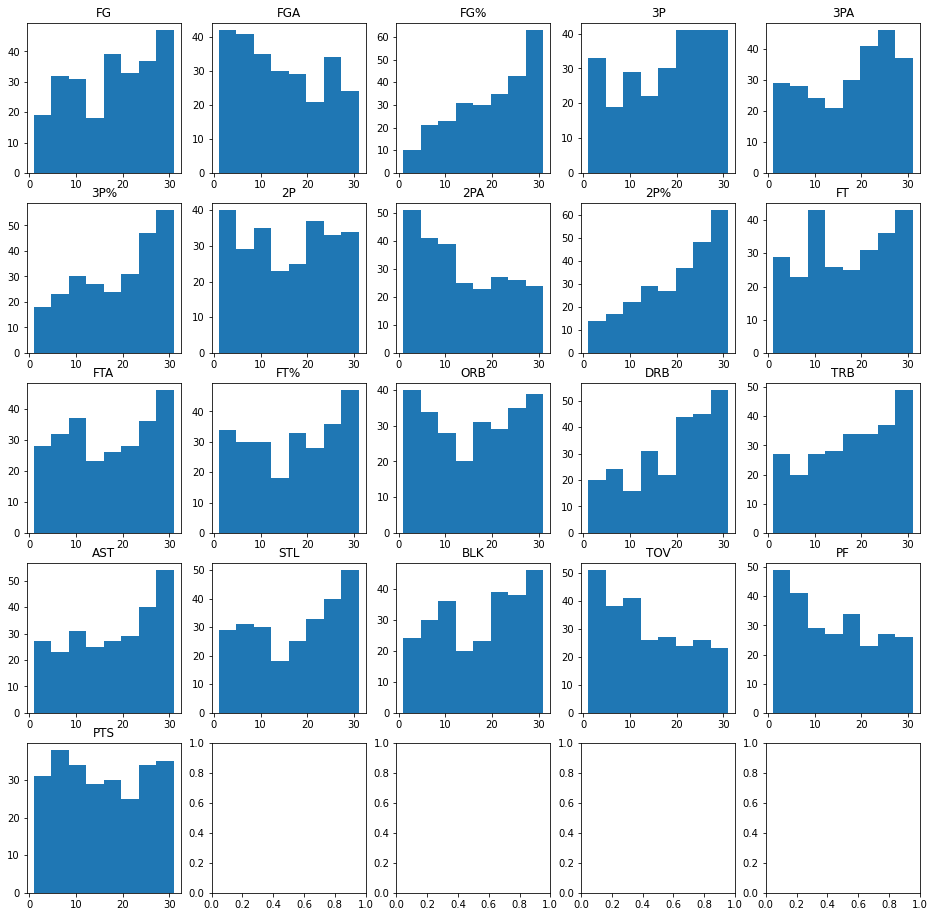

In [56]:
fig, axs = plt.subplots(5,5, figsize=(16,16))
y=0
z=0
for stat in noplayoffs:
    if stat not in ['Team','G','MP','Playoffs']:
        axs[y,z].hist(playoffs[stat], bins = 8)
        axs[y,z].set_title(stat)
        if z < 5:
            z+=1
        if z == 5:
            z = 0
            y+=1

# Now let's clean up the data for just what stats matter

In [6]:
overallstats = overallstats[~overallstats['Team'].str.contains("League Average")]
overallstats = overallstats[['3P%','2P%','DRB','AST','STL','BLK','TOV','PF','Playoffs']]

In [7]:
overallstats

,3P%,2P%,DRB,AST,STL,BLK,TOV,PF,Playoffs
0,20.0,30.0,25.5,28.0,16.5,21.0,1.0,3.0,1
1,30.0,29.0,18.5,30.0,24.0,4.5,6.5,2.0,1
2,5.0,28.0,23.5,27.0,21.0,8.5,5.0,13.5,1
3,21.0,21.0,20.0,24.0,3.0,11.5,3.0,5.0,1
4,8.5,17.0,6.0,21.5,28.0,26.0,21.0,21.0,1
...,...,...,...,...,...,...,...,...,...
489,10.0,10.5,17.0,14.0,17.0,27.5,24.0,16.0,0
490,12.5,3.0,10.0,4.0,12.0,4.5,19.0,9.5,0
491,3.5,1.0,11.0,1.0,7.5,18.0,15.5,16.0,0
492,18.5,2.0,2.5,2.0,2.5,1.0,9.0,6.5,0


In [8]:
overallstats.to_csv(f"statsfor{start}to{stop}.csv",index=False)